# Pre-Processing Data Cleaning:
NaN values and Outliers have to removed,so that the data is Machine Learning ready. 

In [3]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
os.getcwd()

os.chdir('C:\\Users\\iZfig\OneDrive\Desktop\Mini_project\DataSet')

df=pd.read_csv('rawd.csv',delimiter=',')
df.head()

,Year,Month,Day,Rain,Evap,MaxTemp,MinTemp,WindVelocity,Solar_Radiation,Bright_Sunshine,Rel_Humidity,PM2.5
0,2018,1,1,0.0,3.3,29.8,10.4,2.4,16.2,9.3,89,56.22
1,2018,1,2,0.0,4.0,29.6,11.4,2.1,15.8,9.0,89,63.57
2,2018,1,3,0.0,3.6,29.2,13.4,3.2,12.7,8.4,88,72.61
3,2018,1,4,0.0,3.5,28.6,10.8,3.4,13.9,6.0,89,68.25
4,2018,1,5,0.0,4.6,28.2,9.6,4.4,14.1,7.3,88,70.88


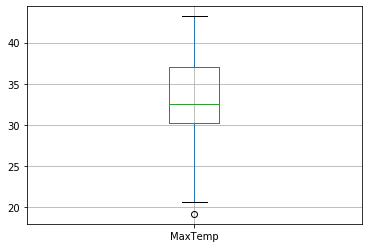

In [4]:
df.boxplot(column='MaxTemp')

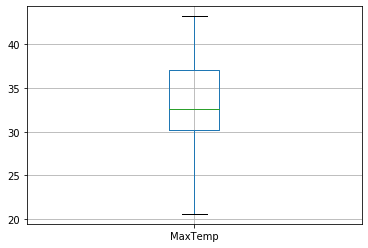

In [5]:
# Elimination of Outliers using IQR
q1 = df['MaxTemp'].quantile(0.25)
q3 = df['MaxTemp'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr
high = q3+1.5*iqr
df = df.loc[(df['MaxTemp'] > low) & (df['MaxTemp'] < high)]
df.boxplot(column='MaxTemp')

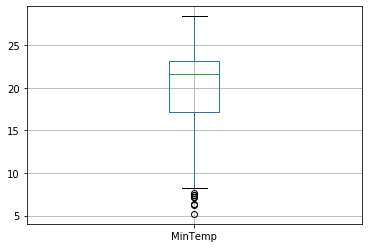

In [6]:
df.boxplot(column='MinTemp')

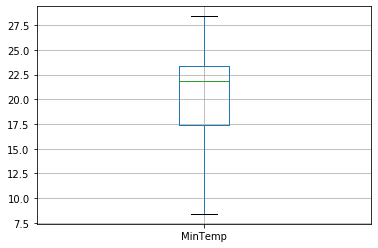

In [7]:
# Elimination of Outliers using IQR
q1 = df['MinTemp'].quantile(0.25)
q3 = df['MinTemp'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr
high = q3+1.5*iqr
df = df.loc[(df['MinTemp'] > low) & (df['MinTemp'] < high)]
df.boxplot(column='MinTemp')

In [8]:
df.isnull().sum()
# 8 Null Values

Year               0
Month              0
Day                0
Rain               0
Evap               0
MaxTemp            0
MinTemp            0
WindVelocity       0
Solar_Radiation    0
Bright_Sunshine    0
Rel_Humidity       0
PM2.5              8
dtype: int64

In [9]:
cd=df.fillna(df['PM2.5'].median)
# Filling all NaN values with Median

In [10]:
cd.isnull().sum()

Year               0
Month              0
Day                0
Rain               0
Evap               0
MaxTemp            0
MinTemp            0
WindVelocity       0
Solar_Radiation    0
Bright_Sunshine    0
Rel_Humidity       0
PM2.5              0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585 entries, 0 to 596
Data columns (total 12 columns):
Year               585 non-null int64
Month              585 non-null int64
Day                585 non-null int64
Rain               585 non-null float64
Evap               585 non-null float64
MaxTemp            585 non-null float64
MinTemp            585 non-null float64
WindVelocity       585 non-null float64
Solar_Radiation    585 non-null float64
Bright_Sunshine    585 non-null float64
Rel_Humidity       585 non-null int64
PM2.5              577 non-null float64
dtypes: float64(8), int64(4)
memory usage: 59.4 KB


In [12]:
df.fillna(df.mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585 entries, 0 to 596
Data columns (total 12 columns):
Year               585 non-null int64
Month              585 non-null int64
Day                585 non-null int64
Rain               585 non-null float64
Evap               585 non-null float64
MaxTemp            585 non-null float64
MinTemp            585 non-null float64
WindVelocity       585 non-null float64
Solar_Radiation    585 non-null float64
Bright_Sunshine    585 non-null float64
Rel_Humidity       585 non-null int64
PM2.5              585 non-null float64
dtypes: float64(8), int64(4)
memory usage: 59.4 KB


In [13]:
df.head()


,Year,Month,Day,Rain,Evap,MaxTemp,MinTemp,WindVelocity,Solar_Radiation,Bright_Sunshine,Rel_Humidity,PM2.5
0,2018,1,1,0.0,3.3,29.8,10.4,2.4,16.2,9.3,89,56.22
1,2018,1,2,0.0,4.0,29.6,11.4,2.1,15.8,9.0,89,63.57
2,2018,1,3,0.0,3.6,29.2,13.4,3.2,12.7,8.4,88,72.61
3,2018,1,4,0.0,3.5,28.6,10.8,3.4,13.9,6.0,89,68.25
4,2018,1,5,0.0,4.6,28.2,9.6,4.4,14.1,7.3,88,70.88


# Correlation analysis

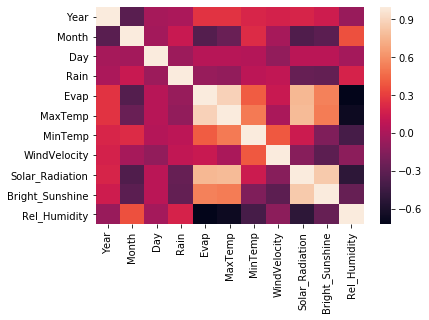

In [14]:
c = cd.corr()
sns.heatmap(c,xticklabels=c.columns,yticklabels=c.columns)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585 entries, 0 to 596
Data columns (total 12 columns):
Year               585 non-null int64
Month              585 non-null int64
Day                585 non-null int64
Rain               585 non-null float64
Evap               585 non-null float64
MaxTemp            585 non-null float64
MinTemp            585 non-null float64
WindVelocity       585 non-null float64
Solar_Radiation    585 non-null float64
Bright_Sunshine    585 non-null float64
Rel_Humidity       585 non-null int64
PM2.5              585 non-null float64
dtypes: float64(8), int64(4)
memory usage: 59.4 KB


# NO Null Values 

# Feature Selection
Based on the Correlation values 
The Variables that are chosen for Model:
Year,Month,Rain,MinTemp,WindVelocity

In [16]:
X = df[["Year", "Month","Rain","MinTemp","WindVelocity"]]
y = df["PM2.5"]

# Train_Test_Split
60% training data 
40% testing data

In [17]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.4, random_state=1)

In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 407 to 40
Data columns (total 5 columns):
Year            351 non-null int64
Month           351 non-null int64
Rain            351 non-null float64
MinTemp         351 non-null float64
WindVelocity    351 non-null float64
dtypes: float64(3), int64(2)
memory usage: 16.5 KB


In [19]:
y_train

407    59.840000
589    33.640000
296    63.780000
248    20.390000
118    33.320000
338    62.060000
416    33.610000
545    14.620000
506    30.300000
318    72.380000
142    42.440000
109    39.500000
85     55.020000
207    11.980000
247    20.690000
224     6.360000
249    20.240000
390    28.570000
91     37.990000
188    17.310000
326    70.500000
431    61.070000
540    19.740000
252    31.930000
125    31.400000
167    15.680000
591    19.110000
242    18.230000
404    46.890000
510    45.110000
         ...    
212    18.200000
319    32.120000
525    15.030000
316    66.840000
546    16.690000
322    22.820000
7      68.460000
405    58.380000
144    38.990000
89     47.550000
490    37.160000
515    28.910000
218    12.430000
574     8.140000
410    26.820000
502    45.520000
255    32.720000
480    39.680000
361    62.430000
257    38.990000
279    65.140000
181    37.188718
284    56.090000
402    51.740000
520    27.540000
132    25.970000
147    25.670000
75     48.0200

In [20]:
features = X_train.iloc[:,:].values
features

array([[2.019e+03, 2.000e+00, 0.000e+00, 1.840e+01, 9.400e+00],
       [2.019e+03, 8.000e+00, 6.000e-01, 2.280e+01, 6.200e+00],
       [2.018e+03, 1.000e+01, 6.000e-01, 2.220e+01, 3.700e+00],
       ...,
       [2.018e+03, 3.000e+00, 4.000e-01, 1.880e+01, 7.100e+00],
       [2.018e+03, 8.000e+00, 4.500e+00, 2.220e+01, 9.600e+00],
       [2.018e+03, 2.000e+00, 0.000e+00, 1.360e+01, 4.200e+00]])

In [21]:
labels = y_train.iloc[:].values
labels

array([59.84     , 33.64     , 63.78     , 20.39     , 33.32     ,
       62.06     , 33.61     , 14.62     , 30.3      , 72.38     ,
       42.44     , 39.5      , 55.02     , 11.98     , 20.69     ,
        6.36     , 20.24     , 28.57     , 37.99     , 17.31     ,
       70.5      , 61.07     , 19.74     , 31.93     , 31.4      ,
       15.68     , 19.11     , 18.23     , 46.89     , 45.11     ,
       34.44     , 45.8      ,  3.       , 31.78     , 75.16     ,
       15.64     , 37.54     , 54.7      , 28.92     , 63.57     ,
       56.95     , 62.8      , 48.22     , 38.07     , 28.94     ,
       11.33     , 27.27     , 57.46     , 59.8      , 40.39     ,
       13.49     , 39.33     ,  6.71     , 68.86     , 33.04     ,
       23.45     , 76.88     , 21.04     , 34.93     , 30.53     ,
       21.58     , 38.21     , 61.72     , 20.1      , 24.83     ,
       14.35     , 19.91     , 37.1887175, 26.81     , 13.57     ,
       62.4      , 33.15     , 34.91     , 36.41     , 23.64  

In [22]:
X=features
y=labels

# Instantiate Multiple linear regrssion model
After Feature Selection,we instantiate LinearRegression model and fit the Features and target to the Model

In [23]:
from sklearn import linear_model as lm
model=lm.LinearRegression()
results=model.fit(X,y)

In [24]:
#Predictions for the trained Data Set
predictions = model.predict(X)

In [32]:
#Check model accuracy
accuracy=model.score(X,y)
print('Accuracy of the model:', (accuracy*100))

Accuracy of the model: 70.33709094908502


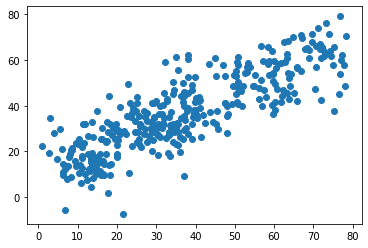

In [33]:
#Visualize the predictions
plt.scatter(y, predictions)

# The Predicted values show a Linear sort of Distribution

In [34]:
#Evaluating the model 
from sklearn.metrics import mean_squared_error, r2_score

# printing values
print('Slope:' ,model.coef_)
print('Intercept:', model.intercept_)
print("\n")

Slope: [ 2.56285651 -0.0987022  -0.49158425 -1.82388739 -2.97915439]
Intercept: -5076.170297013493




In [35]:
import numpy as np
rmse = (np.sqrt(mean_squared_error(y,predictions)))
r2 = r2_score(y,predictions)

print("The model performance")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance
RMSE is 10.97978293271289
R2 score is 0.7033709094908502


# Integrating the Model to Front end


# we will use the model's slope and intercept to create a function that takes the features as input and returs the predited target 